⢿ installing pandaslibrariesntNote: Dependent package 'numpy' contains 1 apps
  - f2py

No apps associated with package pandas. Try again with '--include-deps' to
include apps of dependent packages, which are listed above. If you are
attempting to install a library, pipx should not be used. Consider using pip
or a similar tool instead.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
import os

In [196]:
dataMAE100=pd.read_csv('./data/maeTest100.csv',delimiter=',')
dataMAE500=pd.read_csv('./data/maeTest500.csv',delimiter=',')
dataMAE1000=pd.read_csv('./data/maeTest1000.csv',delimiter=',')
dataMAE2000=pd.read_csv('./data/maeTest2000.csv',delimiter=',')
dataTime100=pd.read_csv('./data/timeTest100.csv',delimiter=',')
dataTime500=pd.read_csv('./data/timeTest500.csv',delimiter=',')
dataTime1000=pd.read_csv('./data/timeTest1000.csv',delimiter=',')
dataTime2000=pd.read_csv('./data/timeTest2000.csv',delimiter=',')
dataPercMax100=pd.read_csv('./data/percTestMax100.csv',delimiter=',')
dataPercMax500=pd.read_csv('./data/percTestMax500.csv',delimiter=',')
dataPercMax1000=pd.read_csv('./data/percTestMax1000.csv',delimiter=',')
dataPercMax2000=pd.read_csv('./data/percTestMax2000.csv',delimiter=',')

dataPercAvg100=pd.read_csv('./data/percTestAvg100.csv',delimiter=',')
dataPercAvg500=pd.read_csv('./data/percTestAvg500.csv',delimiter=',')
dataPercAvg1000=pd.read_csv('./data/percTestAvg1000.csv',delimiter=',')
dataPercAvg2000=pd.read_csv('./data/percTestAvg2000.csv',delimiter=',')


In [194]:
def plotMAE(data, head, imgname):
    plt.figure(figsize=(7, 4))

    y= np.array(data['Mean average error'].head(head))
    x= np.array(data['Sakoe Chiba value'].head(head))
    plt.plot(x, y, color='blue')

    plt.legend()

    plt.ylabel('Mean average error')
    plt.xlabel('Sakoe Chiba value')
    plt.savefig(imgname + '.png')
    plt.show()

<Figure size 1000x1000 with 0 Axes>

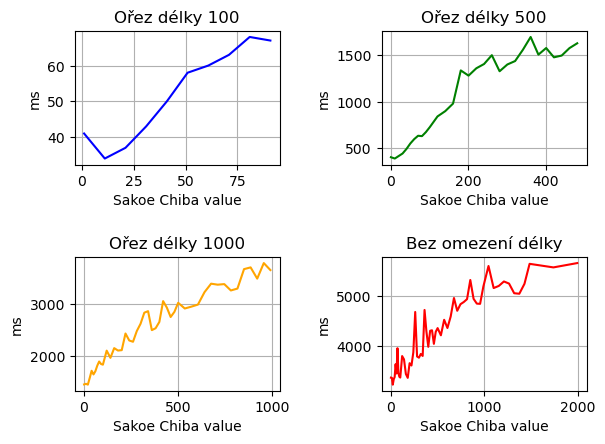

<Figure size 1000x1000 with 0 Axes>

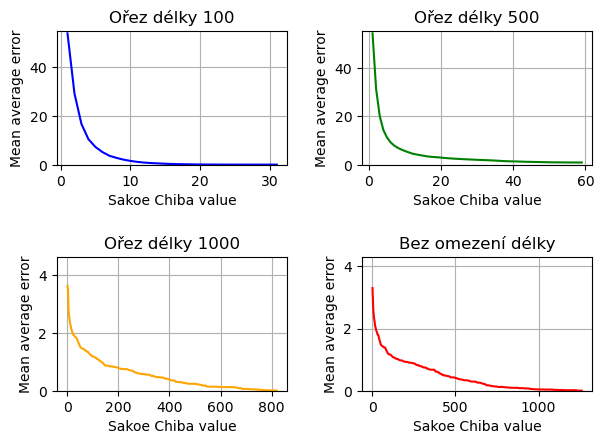

<Figure size 1000x1000 with 0 Axes>

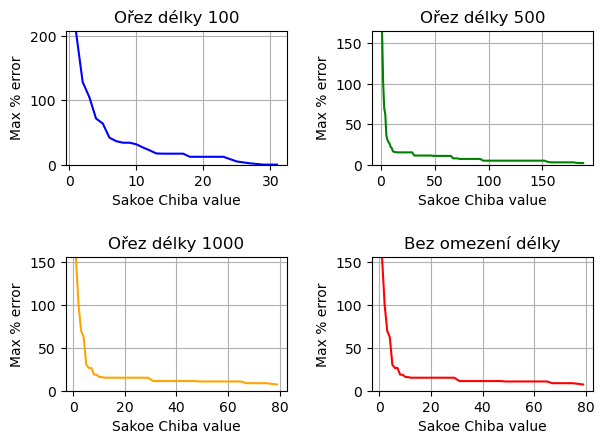

<Figure size 1000x1000 with 0 Axes>

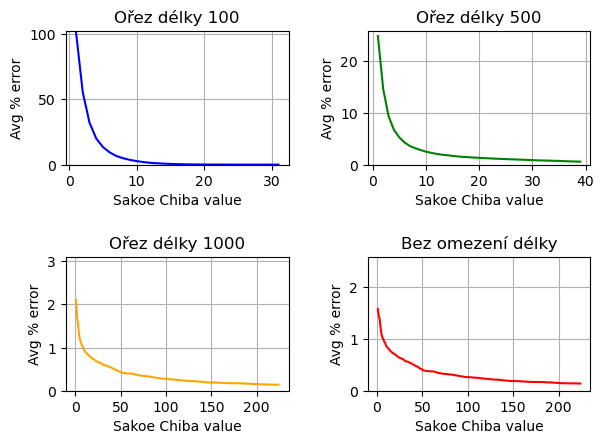

In [197]:
def plotMAEMulti(data):
    plt.figure(figsize=(7, 4))

    x= np.array(data['Sakoe Chiba value'])
    y= np.array(data['Mean average error'])
    
    plt.plot(x, y, color='blue')

    plt.legend()

    plt.ylabel('Mean average error')
    plt.xlabel('Sakoe Chiba value')
    plt.savefig('maeMulti.png')
    plt.grid()
    plt.show()

def plotMultiTime(axis, data, title, color, yField, head):

    x= np.array(data['Sakoe Chiba value'].head(head))
    y= np.array(data[yField].head(head))

    axis.set_title(title) 
    axis.set_ylabel(yField)
    axis.set_xlabel('Sakoe Chiba value')
    axis.grid()
    axis.plot(x, y, color=color)

def plotMAEMultiA(axis, data, title, color, yField, head):

    x= np.array(data['Sakoe Chiba value'].head(head))
    y= np.array(data[yField].head(head))

    axis.set_title(title) 
    axis.set_ylabel(yField)
    axis.set_xlabel('Sakoe Chiba value')
    axis.set_ylim(0,max(y)+1)
    axis.grid()
    axis.plot(x, y, color=color)


def plotGridTime():
    plt.figure(figsize=(10, 10))
    figure, axis = plt.subplots(2, 2) 

    yField = "ms"
    plotMultiTime(axis[0,0], dataTime100, "Ořez délky 100", "blue",yField,2000)
    plotMultiTime(axis[0,1], dataTime500, "Ořez délky 500", "green", yField,2000)
    plotMultiTime(axis[1,0], dataTime1000, "Ořez délky 1000", "orange", yField,2000)
    plotMultiTime(axis[1,1], dataTime2000, "Bez omezení délky", "red", yField,2000)
    plt.tight_layout(pad=2.0)

    plt.savefig("timeMulti.png",dpi=150)
    
    plt.show()



def plotGridMAE():
    plt.figure(figsize=(10, 10))
    figure, axis = plt.subplots(2, 2) 

    yField = "Mean average error"
    plotMAEMultiA(axis[0,0], dataMAE100, "Ořez délky 100", "blue",yField,1000)
    plotMAEMultiA(axis[0,1], dataMAE500, "Ořez délky 500", "green", yField,40)
    plotMAEMultiA(axis[1,0], dataMAE1000, "Ořez délky 1000", "orange", yField,1000)
    plotMAEMultiA(axis[1,1], dataMAE2000, "Bez omezení délky", "red", yField,1000)
    plt.tight_layout(pad=2.0)

    plt.savefig("maeMulti.png",dpi=150)
    
    plt.show()

def plotGridPercMax():
    plt.figure(figsize=(10, 10))
    figure, axis = plt.subplots(2, 2) 

    yField = "Max % error"
    plotMAEMultiA(axis[0,0], dataPercMax100, "Ořez délky 100", "blue",yField,40)
    plotMAEMultiA(axis[0,1], dataPercMax500, "Ořez délky 500", "green", yField,90)
    plotMAEMultiA(axis[1,0], dataPercMax1000, "Ořez délky 1000", "orange", yField,50)
    plotMAEMultiA(axis[1,1], dataPercMax2000, "Bez omezení délky", "red", yField,50)
    plt.tight_layout(pad=2.0)

    
    plt.savefig("percMaxMulti.png",dpi=150)
    

    plt.show()


def plotGridPercAvg():
    plt.figure(figsize=(10, 10))
    figure, axis = plt.subplots(2, 2) 

    yField = "Avg % error"
    plotMAEMultiA(axis[0,0], dataPercAvg100, "Ořez délky 100", "blue",yField,30)
    plotMAEMultiA(axis[0,1], dataPercAvg500, "Ořez délky 500", "green", yField,30)
    plotMAEMultiA(axis[1,0], dataPercAvg1000, "Ořez délky 1000", "orange", yField,100)
    plotMAEMultiA(axis[1,1], dataPercAvg2000, "Bez omezení délky", "red", yField,100)
    plt.tight_layout(pad=2.0)

    plt.savefig("percAvgMulti.png",dpi=150)
    

    plt.show()

plotGridTime()
plotGridMAE()
plotGridPercMax()
plotGridPercAvg()


# plotMAEMultiA(dataTime100,dataTime500,dataTime1000,dataTime2000, "timeMulti.png", "Duration ms")

# plotGrid(dataPercMax100,dataPercMax500,dataPercMax1000,dataPercMax2000, "percMaxMulti.png",'Mean average error')

In [9]:
def plotDuration(data1, head, imgname):
    plt.figure(figsize=(7, 4))

    y= np.array(data['Duration ms'].head(head))
    x= np.array(data['Sakoe Chiba value'].head(head))
    plt.plot(x, y, color='blue')

    plt.legend()

    plt.ylabel('Duration ms')
    plt.xlabel('Sakoe Chiba value')
    plt.savefig(imgname + '.png')
    plt.show()

NameError: name 'x2' is not defined

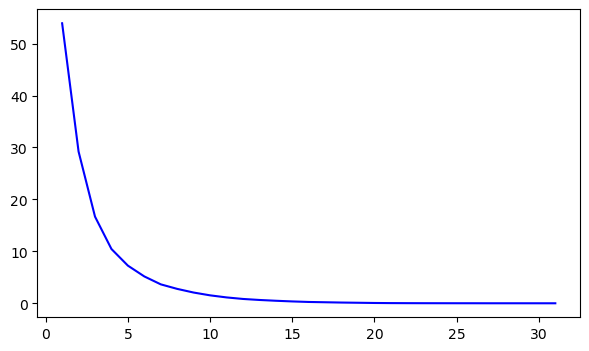

In [27]:
plotMAEMulti()
plotDuration(dataTime200,-1, '90_110')